In [1]:
# Set up packages for lecture. Don't worry about understanding this code, but
# make sure to run it if you're following along.
import numpy as np
import babypandas as bpd
import pandas as pd
from matplotlib_inline.backend_inline import set_matplotlib_formats
import matplotlib.pyplot as plt
%reload_ext pandas_tutor
%set_pandas_tutor_options {'projectorMode': True}
set_matplotlib_formats("svg")
plt.style.use('fivethirtyeight')

np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

# Lecture 14 – Distributions and Sampling

## DSC 10, Summer 2022

### Announcements

- Good job on the midterm!
- Fill out **the [Mid-Quarter Survey][survey] by 11:59pm tonight**.
    - If 90% of the class fills it out, everyone gets +0.5 points back on the midterm.
    - Right now we're at 50%!
- The Midterm Project is due **Sat, 8/6 at 11:59pm**.


[survey]: https://docs.google.com/forms/d/e/1FAIpQLSd-DNxEqG-qb44LTt_zinwcYXsfh7IjaUuDSugFdq_waF4PAw/viewform

## So far...

- Experiments
- DataFrames
- Plotting
- Iteration
- Probability
- Simulation

## Next...

- Hypothesis testing
- Bootstrapping
- Confidence intervals
- Regression

⚠️ Tricky concepts! Expect to spend more time on this part of the course.

## Agenda

- Probability distributions and empirical distributions.
- Populations and samples.
- Parameters and statistics.

## Distributions

### Distributions
- A **distribution** describes the frequency of each value of a variable.
- We visualize distributions of numerical variables with histograms.

### Probability distributions
- Consider a random quantity with various possible values, each of which has some associated probability.
- A **probability distribution** is a description of:
    - All possible values of the quantity.
    - The theoretical probability of each value.
* Example, for rolling a single die:

| Value     |Probability |
| ----------- | ----------- |
| 1      | $\frac{1}{6}$ |
| 2   | $\frac{1}{6}$        |
| 3      | $\frac{1}{6}$       |
| 4   | $\frac{1}{6}$       |
| 5      | $\frac{1}{6}$       |
| 6   | $\frac{1}{6}$        |


### Example: probability distribution of a die roll 🎲

The distribution is **uniform**, meaning that each outcome has the same probability of occurring.

In [2]:
die_faces = np.arange(1, 7, 1)
die = bpd.DataFrame().assign(face=die_faces)
die

,face
0,1
1,2
2,3
3,4
4,5
5,6


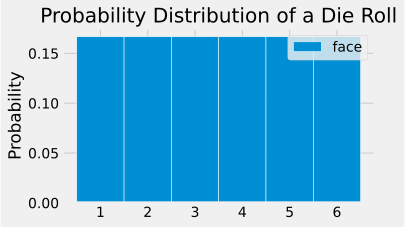

In [3]:
bins = np.arange(0.5, 6.6, 1)

# Note that you can add titles to your visualizations, like this!
die.plot(kind='hist', y='face', bins=bins, density=True, ec='w', 
         title='Probability Distribution of a Die Roll',
         figsize=(5, 3))

# You can also set the y-axis label with plt.ylabel
plt.ylabel('Probability');

### Empirical distributions

- Unlike probability distributions, which are theoretical, **empirical distributions are based on observations**.
- Commonly, these observations are of repetitions of an experiment.
- An **empirical distribution** describes:
    - All observed values.
    - The proportion of observations in which each value occurred.
- Unlike probability distributions, empirical distributions represent what actually happened in practice. 

### Example: Empirical distribution of a die roll 🎲
- Let's simulate a roll by using `np.random.choice`.
- Rolling a die = sampling with replacement.
    - If you roll a 4, you can roll a 4 again.

In [4]:
num_rolls = 25
many_rolls = np.random.choice(die_faces, num_rolls)
many_rolls

array([5, 4, 4, ..., 3, 2, 5])

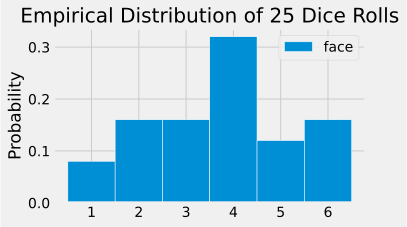

In [5]:
(bpd.DataFrame()
 .assign(face=many_rolls) 
 .plot(kind='hist', y='face', bins=bins, density=True, ec='w',
       title=f'Empirical Distribution of {num_rolls} Dice Rolls',
       figsize=(5, 3))
)
plt.ylabel('Probability');

### You Try: many die rolls 🎲

What happens if we increase the number of die rolls? 🤔

Make a histogram for the empirical distribution of 100, 1000, 5000, and 10000 rolls. What you do notice?

### Many die rolls 🎲

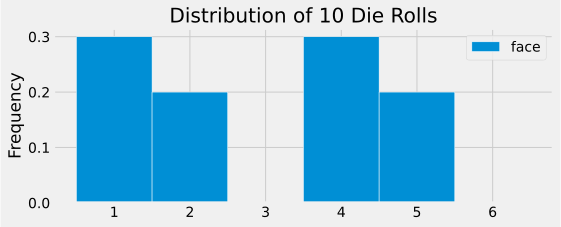

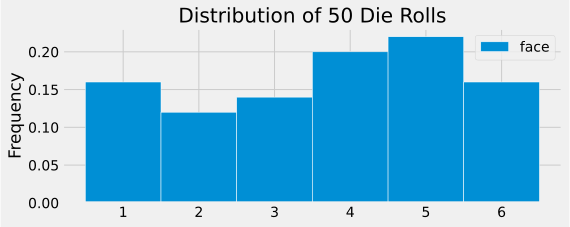

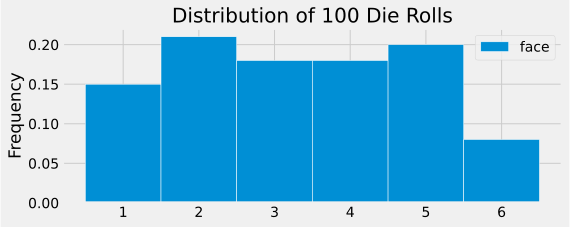

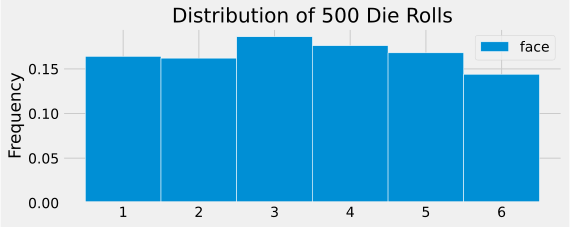

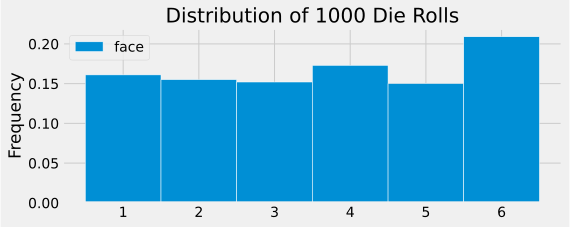

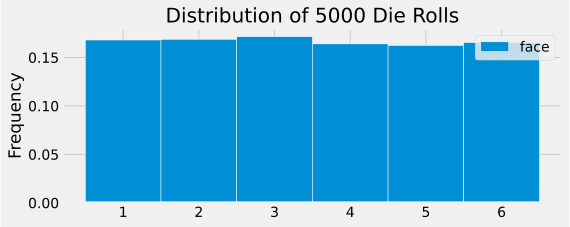

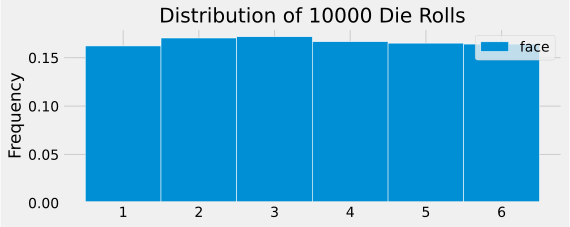

In [6]:
for num_rolls in [10, 50, 100, 500, 1000, 5000, 10000]:
    # Don't worry about how .sample works just yet – we'll cover it shortly
    (die.sample(n=num_rolls, replace=True)
     .plot(kind='hist', y='face', bins=bins, density=True, ec='w', 
           title=f'Distribution of {num_rolls} Die Rolls',
           figsize=(8, 3))
    )

### Why does this happen? ⚖️

The **law of large numbers** states that if a chance experiment is repeated 
- many times,
- independently, and
- under the same conditions,
    
then the **proportion** of times that an event occurs gets closer and closer to the **theoretical probability** of that event.

**For example:** As you roll a die repeatedly, the proportion of times you roll a 5 gets closer to $\frac{1}{6}$.

## Sampling

### Populations and samples

- A **population** is the complete group of people, objects, or events that we want to learn something about.
- It's often infeasible to collect information about every member of a population.
- Instead, we can collect a **sample**, which is a subset of the population.
- **Goal**: estimate the distribution of some numerical variable in the population, using only a sample.
    - For example, say I want to know the number of credits each UCSD student is taking this quarter.
    - It's too hard to get this information for every UCSD student, so we don't know the **population distribution**.
    - Instead we collect data from only certain UCSD students to generate a **sample distribution**.

**Question:** How do we collect a good sample, so that the sample distribution closely approximates the population distribution?

- **Bad idea ❌:** Survey whoever you can get ahold of (e.g. internet survey, people in line at Panda Express at PC).
    - Such a sample is known as a convenience sample.
    - Convenience samples often contain hidden sources of **bias**.

### Probability sample (aka random sample)

- In order for a sample to be a probability sample, you **must be able to calculate the probability of selecting any subset of the population**.
- Not all individuals need to have an equal chance of being selected.
- What's the point?
    - There's a better chance of collecting a **representative** sample this way.

### Example: movies 🎥

In [7]:
top = bpd.read_csv('data/top_movies.csv')
top

,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
1,Avatar,Fox,760507625,846120800,2009
2,Titanic,Paramount,658672302,1178627900,1997
...,...,...,...,...,...
197,Duel in the Sun,Selz.,20408163,443877500,1946
198,Sergeant York,Warner Bros.,16361885,418671800,1941
199,The Four Horsemen of the Apocalypse,MPC,9183673,399489800,1921


### A probability sample
- **Scheme:** Start with a random number between 0 and 9 take every tenth row thereafter.
    - **This is a probability sample!**
- Any given row is equally likely to be picked, with probability 1/10.
- It is **not** true that every subset of rows has the same probability of being selected.
    - There are only 10 possible samples: rows (0, 10, 20, 30, ..., 190), rows (1, 11, 21, ..., 191), and so on.

In [8]:
start = np.random.choice(np.arange(10))
top.take(np.arange(start, 200, 10))

,Title,Studio,Gross,Gross (Adjusted),Year
9,The Dark Knight Rises,Warner Bros.,448139099,500961700,2012
19,Jurassic Park,Universal,402453882,799721000,1993
29,Inside Out,Buena Vista (Disney),356461711,375723400,2015
...,...,...,...,...,...
179,Guess Who's Coming to Dinner,Columbia,56666667,376335900,1967
189,The Robe,Fox,36000000,569454500,1953
199,The Four Horsemen of the Apocalypse,MPC,9183673,399489800,1921


### Simple random sample

- A **simple random sample (SRS)** is a sample drawn **uniformly** at random **without** replacement.
- In an SRS...
    - Every individual has the same chance of being selected.
    - Every pair has the same chance of being selected.
    - Every triplet has the same chance of being selected.
    - And so on...
- To perform an SRS from a list or array `options`, we use `np.random.choice(options, replace=False)`.
    - If we use `replace=True`, then we're **sampling uniformly at random with replacement** – there's no simpler term for this.

### Sampling rows from a DataFrame

If we want to sample rows from a DataFrame, we can use the `.sample` method on a DataFrame.

```py
df.sample(n)
```

returns a random subset of `n` rows of `df`, drawn **without replacement** (i.e. the default is `replace=False`, unlike `np.random.choice`).

In [9]:
# Without replacement
top.sample(5)

,Title,Studio,Gross,Gross (Adjusted),Year
152,Kramer Vs. Kramer,Columbia,106260000,374276100,1979
172,My Fair Lady,Warner Bros.,72000000,522000000,1964
142,On Golden Pond,Universal,119285432,353083700,1981
146,The Rocky Horror Picture Show,Fox,112892319,479104000,1975
75,Men in Black,Sony,250690539,475165100,1997


In [10]:
# With replacement
top.sample(5, replace=True)

,Title,Studio,Gross,Gross (Adjusted),Year
65,The Matrix Reloaded,Warner Bros.,281576461,406254600,2003
182,Goldfinger,UA,51081062,576810000,1964
162,Cinderella (1950),Disney,93141149,547050200,1950
71,How the Grinch Stole Christmas,Universal,260044825,418529400,2000
15,Toy Story 3,Buena Vista (Disney),415004880,454156300,2010


### The effect of sample size

- The law of large numbers states that when we repeat a chance experiment more and more times, the empirical distribution will look more and more like the true probability distribution.
- **Similarly, if we take a large simple random sample, then the sample distribution is likely to be a good approximation of the true population distribution.**

### Example: distribution of flight delays ✈️

`united_full` contains information about all United flights leaving SFO between 6/1/15 and 8/31/15.

In [11]:
united_full = bpd.read_csv('data/united_summer2015.csv')
united_full

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
...,...,...,...,...
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1
13824,8/31/15,2013,EWR,-2


### Only need delays...

In [12]:
united = united_full.get(['Delay'])
united

,Delay
0,257
1,28
2,-3
...,...
13822,3
13823,-1
13824,-2


### Population distribution of flight delays ✈️

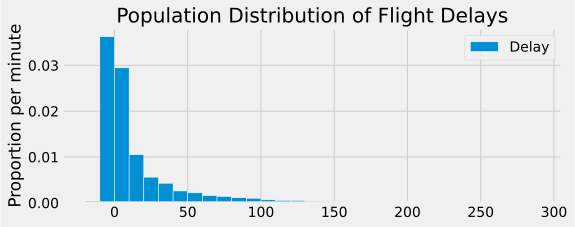

In [13]:
bins = np.arange(-20, 300, 10)
united.plot(kind='hist', y='Delay', bins=bins, density=True, ec='w', 
            title='Population Distribution of Flight Delays', figsize=(8, 3))
plt.ylabel('Proportion per minute');

Note that this distribution is **fixed**.

### Sample distribution of flight delays ✈️

- The 13825 flight delays in `united` constitute our population.
- Normally, we won't have access to the entire population.
- To replicate a real-world scenario, we will sample from `united` **without replacement**.

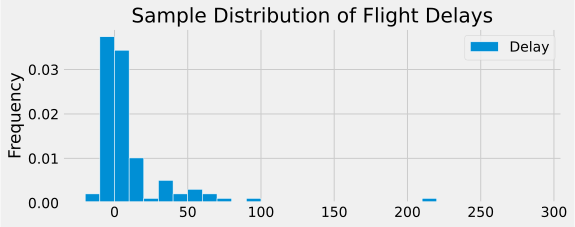

In [14]:
# Sample distribution
N = 100
(united
 .sample(N)
 .plot(kind='hist', y='Delay', bins=bins, density=True, ec='w',
       title='Sample Distribution of Flight Delays',
       figsize=(8, 3))
);

Note that as we increase `N`, the sample distribution of delays looks more and more like the true population distribution of delays.

## Parameters and statistics

### Terminology

- **Statistical inference** is the practice of making conclusions about a population, using data from a random sample.
- **Parameter**: A number associated with the population.
    - Example: the population mean.
- **Statistic**: A number calculated from the sample.
    - Example: the sample mean.
- A statistic can be used as an **estimate** for a parameter.

_To remember: **p**arameter and **p**opulation both start with p, **s**tatistic and **s**ample both start with s._

### Mean flight delay ✈️

**Question:** What is the average delay of United flights out of SFO? 🤔

- We'd love to know the **mean delay in the population (parameter)**, but in practice we'll only have a **sample**.

- How does the **mean delay in the sample (statistic)** compare to the **mean delay in the population (parameter)**?

### Population mean

The **population mean** is a **parameter**.

In [15]:
# Calculate the mean of the population
united_mean = united.get('Delay').mean()
united_mean

16.658155515370705

This number (like the population distribution) is fixed, and is not random.

### Sample mean

The **sample mean** is a **statistic**. Since it depends on our sample, which was drawn at random, the sample mean is **also random**.

In [16]:
# Size 100
united.sample(100).get('Delay').mean()

19.64

- Each time we run the cell above, we are:
    - Collecting a new sample of size 100 from the population, and
    - Computing the sample mean.
- We see a slightly different value on each run of the cell.
    - Sometimes, the sample mean is close to the population mean.
    - Sometimes, it's far away from the population mean.

### The effect of sample size

What if we choose a larger sample size?

In [17]:
# Size 1000
united.sample(1000).get('Delay').mean()

16.616

- Each time we run this cell, the result is still slightly different.
- However, the results seem to be much closer together – and much closer to the true population mean – than when we used a sample size of 100.
- **In general**, statistics computed on larger samples tend to be more accurate than statistics computed on smaller samples.

## You Try: Increasing sample size, part 2

1. Take 2000 samples of size 100 from `united`.
1. Find the mean delay for each sample.
1. Plot the distribution of means on a histogram.
1. Repeat steps 1-3 for a sample of size 1000. Make sure that the histograms have similar x-axis limits.
1. What do you notice?

### Smaller Samples:<center><img src='data/bullseye-high.png' width=300></center>
### Larger Samples:<center><img src='data/bullseye-low.png' width=300></center>

### Probability distribution of a statistic

- The value of a statistic, e.g. the sample mean, is random, because it depends on a random sample.
- Like other random quantities, we can study the "probability distribution" of the statistic (also known as its "sampling distribution").
    - This describes all possible values of the statistic and all the corresponding probabilities.
- Unfortunately, this can be hard to calculate exactly.
    - Option 1: do the math by hand.
    - Option 2: generate **all** possible samples and calculate the statistic on each sample.
- So we'll use simulation again to approximate:
    - Generate **a lot of** possible samples and calculate the statistic on each sample.

### Distribution of sample means

- Let's...
    - Repeatedly draw a bunch of samples.
    - Record the mean of each.
    - Draw a histogram of the resulting distribution.
- Try different sample sizes and look at the resulting histogram!

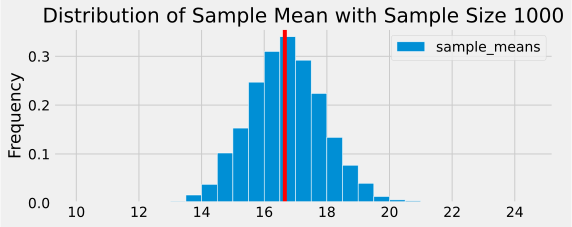

In [18]:
# Sample one thousand flights, two thousand times
sample_size = 1000
repetitions = 2000
sample_means = np.array([])

for n in np.arange(repetitions):
    m = united.sample(sample_size).get('Delay').mean()
    sample_means = np.append(sample_means, m)

(bpd.DataFrame()
 .assign(sample_means=sample_means)
 .plot(kind='hist', bins=np.arange(10, 25, 0.5), density=True, ec='w',
       title=f'Distribution of Sample Mean with Sample Size {sample_size}',
       figsize=(8, 3))
);
    
plt.axvline(x=united_mean, c='r');

### Empirical distribution of a statistic
- The empirical distribution of a statistic is based on simulated values of the statistic. It describes
    - all the observed values of the statistic, and
    - the proportion of times each value appeared.
- The empirical distribution of a statistic can be a good approximation to the probability distribution of the statistic, **if the number of repetitions in the simulation is large**.

## You Try: What does increasing sample size really mean?

The two cells below repeat code from this lecture. Both of them take samples from `united` and draw a histogram. But increasing the sample size works differently for these two histograms. Try to figure out why.

1. Change the sample size and rerun the first cell. What happens when the sample size is small? What happens when the sample size is large?
1. Now do the same for the second cell.
1. Why does changing the sample size for these cells produce different results?
1. Come up with a real-world scenario where you would use the histograms from the first and second cells.

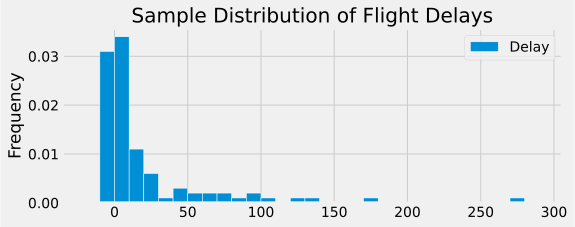

In [19]:
# Sample distribution
N = 100
(united
 .sample(N)
 .plot(kind='hist', y='Delay', bins=bins, density=True, ec='w',
       title='Sample Distribution of Flight Delays',
       figsize=(8, 3))
);

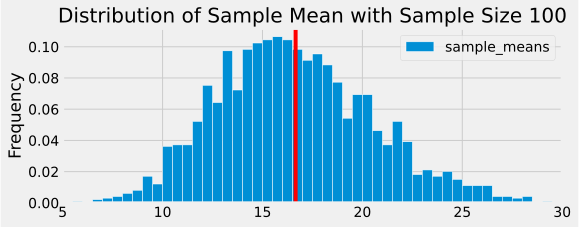

In [20]:
sample_size = 100
repetitions = 2000
sample_means = np.array([])

for n in np.arange(repetitions):
    m = united.sample(sample_size).get('Delay').mean()
    sample_means = np.append(sample_means, m)

(bpd.DataFrame()
 .assign(sample_means=sample_means)
 .plot(kind='hist', bins=np.arange(5, 30, 0.5), density=True, ec='w',
       title=f'Distribution of Sample Mean with Sample Size {sample_size}',
       figsize=(8, 3))
);

plt.xlim(5, 30)
    
plt.axvline(x=united_mean, c='r');

## Why Does It Matter?

- Big cognitive leap for today: randomness not only for individual samples but also for statistics from samples.
- You make judgement calls using distributions all the time.
    - "Wow, bananas are 5 cents, that's cheap!"
    - "Gas prices are 6 dollars, that's expensive 😢."
- Now we're formalizing using the language of statistics: population, sample, statistics, and distributions
- What does the empirical distribution of a sample mean tell us?
    - "I bought 100 bananas for 5 cents each, that's cheap!"
    - "I bought 1000 bananas for 5 cents each, that's really cheap!"
- In real life, we don't have access to the population.
    - We only have one sample and we can only get one statistic.
    - But we can still use the sample to make estimates about the population!
    - Topic for next time.